In [632]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [633]:
#read in cleaned, df from previous notebook
df_org = pd.read_csv('df_cleaned.csv', index_col=0)
df = df_org.copy()

## Exploring Genres


In [634]:
#going to transform the data to stack genres on top of each other i.e. genre1, genre2, genre3, are stacked row wise
#this will enable for easier sorting/group by's
s = df['genres_first3'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
#don't need this anymore
del df['genres']
s.name = 'genres'
df = df.join(s)

In [635]:
df.head()

,id,title,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,vote_average,vote_count,cast,crew,budget,revenue,year,genres_first3,keywords_first3,production_companies_first3,production_countries_first3,spoken_languages_first3,cast_first3,crew_first3,director,film_country,actor_split,actor_1,actor_2,actor_3,p_comp_split,p_comp_1,p_comp_2,p_comp_3,No_English,highest_paid_actor,Action,Adventure,Fantasy,Crime,Drama,Science Fiction,Animation,Family,Thriller,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Unnamed: 60,genres
0,19995,Avatar,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'United States of America', 'iso_316...",2009-12-10,162.0,"[{'name': 'English', 'iso_639_1': 'en'}, {'nam...",Released,7.2,11800,"[{'name': 'Sam Worthington', 'order': 0, 'id':...","[{'job': 'Editor', 'name': 'Stephen E. Rivkin'...",237000000,2787965087,2009,Action|Adventure|Fantasy,culture clash|future|space war,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,English|Español,Sam Worthington|Zoe Saldana|Sigourney Weaver,Stephen E. Rivkin|Rick Carter|Christopher Boyes,James Cameron,United States of America,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",Sam Worthington,Zoe Saldana,Sigourney Weaver,"['Ingenious Film Partners', 'Twentieth Century...",Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Action
0,19995,Avatar,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'United States of America', 'iso_316...",2009-12-10,162.0,"[{'name': 'English', 'iso_639_1': 'en'}, {'nam...",Released,7.2,11800,"[{'name': 'Sam Worthington', 'order': 0, 'id':...","[{'job': 'Editor', 'name': 'Stephen E. Rivkin'...",237000000,2787965087,2009,Action|Adventure|Fantasy,culture clash|future|space war,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,English|Español,Sam Worthington|Zoe Saldana|Sigourney Weaver,Stephen E. Rivkin|Rick Carter|Christopher Boyes,James Cameron,United States of America,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",Sam Worthington,Zoe Saldana,Sigourney Weaver,"['Ingenious Film Partners', 'Twentieth Century...",Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Adventure
0,19995,Avatar,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'United States of America', 'iso_316...",2009-12-10,162.0,"[{'name': 'English', 'iso_639_1': 'en'}, {'nam...",Released,7.2,11800,"[{'name': 'Sam Worthington', 'order': 0, 'id':...","[{'job': 'Editor', 'name': 'Stephen E. Rivkin'...",237000000,2787965087,2009,Action|Adventure|Fantasy,culture clash|future|space war,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,English|Español,Sam Worthington|Zoe Saldana|Sigourney Weaver,Stephen E. Rivkin|Rick Carter|Christopher Boyes,James Cameron,United States of America,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",Sam Worthington,Zoe Saldana,Sigourney Weaver,"['Ingenious Film Partners', 'Twentieth Century...",Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Fantasy
1,285,Pirates of the Caribbean: At World's End,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'United States of America'

In [636]:
#stacking the columns will roughly triple my row count
print(df.shape)
print('')
print(df['genres'].unique())
print('')
print(len(df['genres'].unique()))

(11059, 60)

['Action' 'Adventure' 'Fantasy' 'Crime' 'Drama' 'Science Fiction'
 'Animation' 'Family' 'Thriller' 'Western' 'Comedy' 'Romance' 'Horror'
 'Mystery' 'History' 'War' 'Music' 'Documentary' 'Foreign' 'TV Movie' nan]

21


## Which Genres show up the most: frequency of Genres

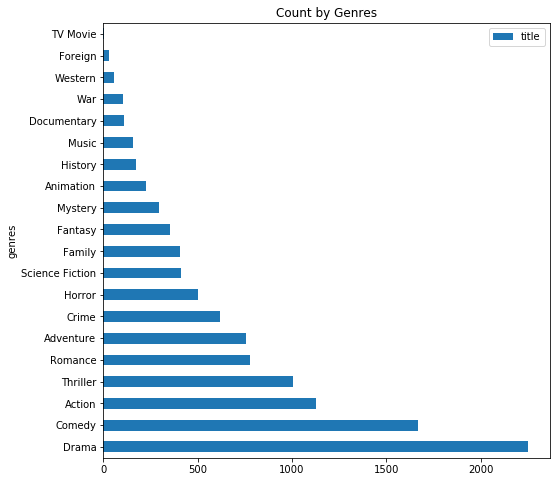

In [496]:
genr = (pd.DataFrame(df.groupby('genres').title.nunique())).sort_values('title', ascending=False)
genr[['title']].plot.barh(stacked=True, title = 'Count by Genres', figsize=(8, 8))

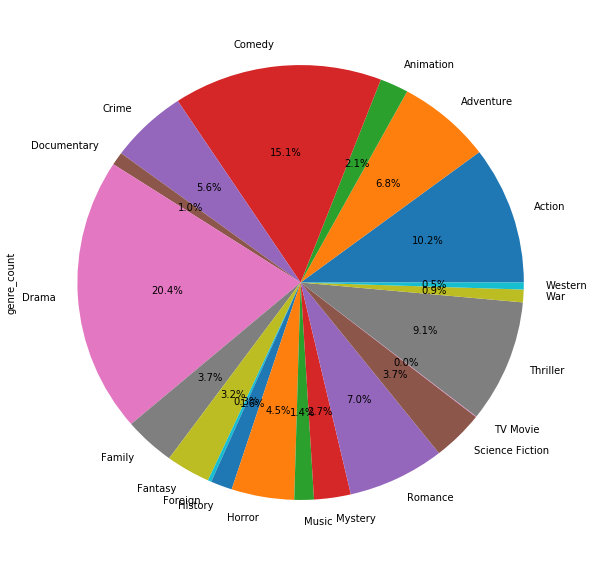

In [494]:
plt.subplots(figsize = (10,10))
pie = df.groupby('genres').title.nunique().reset_index()
labels = pie.genres
pie = pie.title.plot.pie(labels=labels, autopct='%1.1f%%', shadow=False)
pie.set_ylabel('genre_count')

## Which Genres have the highest average budget?

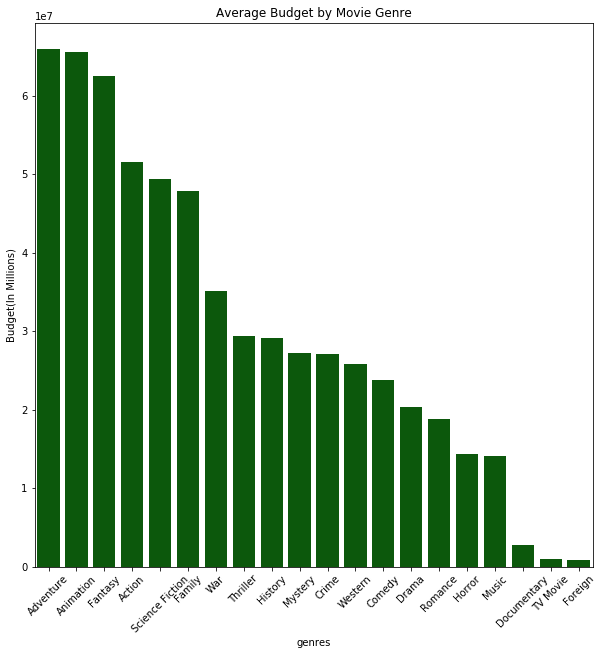

In [637]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.xticks(rotation=45)
genr1 = df[['budget','genres']]
genr1 = df.groupby('genres').budget.mean().reset_index()
genr2 = genr1.sort_values('budget', ascending=False)
g = sns.barplot(x="genres", y="budget", data=genr2, color='darkgreen')
g.set_title('Average Budget by Movie Genre')
g.set_ylabel('Budget(In Millions)')

In [642]:
genr_grp = df.groupby('genres').budget.mean().round(1).reset_index()
genr_grp = genr_grp.sort_values('budget', ascending=False)
genr_grp.set_index('genres')
#genr_grp.head(5)
genr_x = df.groupby('genres').budget.describe().round(1)
genr_x = genr_x.sort_values('std',ascending=False).reset_index()
genr_x[['genres','std']].head(10)

,genres,std
0,Fantasy,64987023.7
1,Adventure,63098469.9
2,Science Fiction,56030428.6
3,Animation,55886090.7
4,Action,55338850.9
5,Family,53442470.1
6,Western,45836322.5
7,War,38616285.7
8,Thriller,35991170.4
9,History,32752772.8


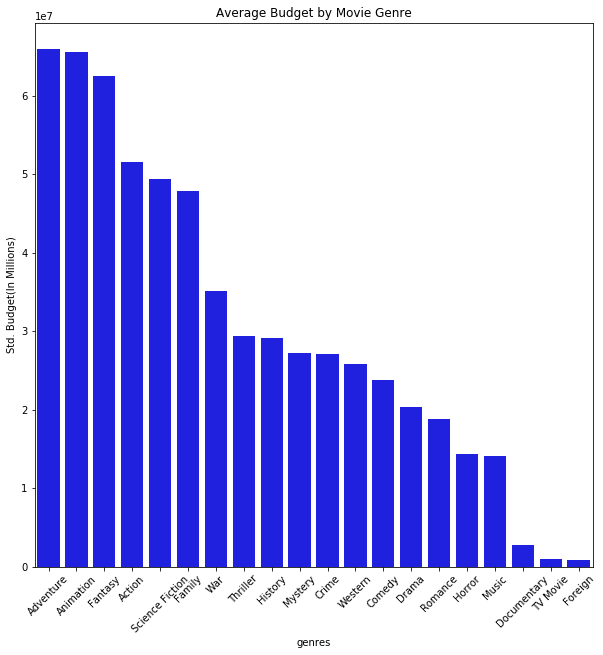

In [644]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.xticks(rotation=45)
g = sns.barplot(x="genres", y="budget", data=genr2, color='blue')
g.set_title('Average Budget by Movie Genre')
g.set_ylabel('Std. Budget(In Millions)')

In [641]:
z = df[df['genres']=='Fantasy'].groupby('title').budget.sum().reset_index()
z = z.sort_values('budget',ascending=False)
z

,title,budget
183,Pirates of the Caribbean: On Stranger Tides,380000000
181,Pirates of the Caribbean: At World's End,300000000
229,Superman Returns,270000000
219,Spider-Man 3,258000000
104,Harry Potter and the Half-Blood Prince,250000000
350,X-Men: Days of Future Past,250000000
269,The Hobbit: The Desolation of Smaug,250000000
20,Batman v Superman: Dawn of Justice,250000000
268,The Hobbit: The Battle of the Five Armies,250000000
267,The Hobbit: An Unexpected Journey,250000000


## Which Genres have the highest average revenue?

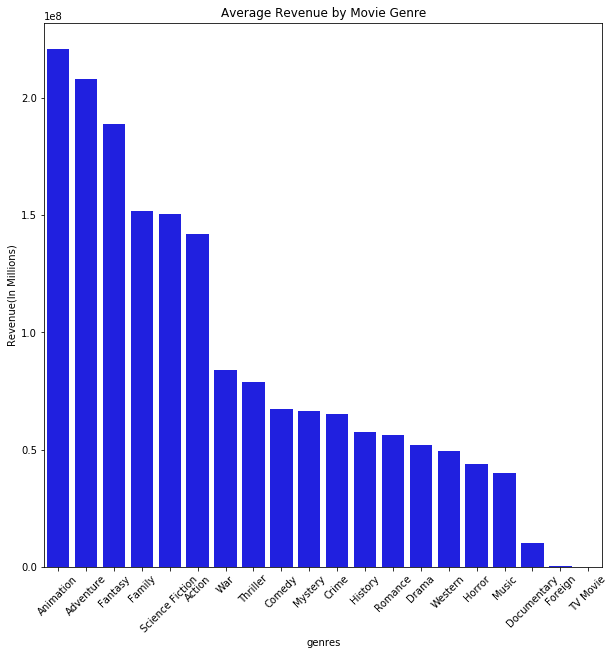

In [645]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.xticks(rotation=45)
r_genr1 = df[['title', 'revenue','genres']].reset_index()
r_genr2 = df.groupby('genres').revenue.mean().reset_index()
r_genr2 = r_genr2.sort_values('revenue', ascending=False)
g = sns.barplot(x="genres", y="revenue", data=r_genr2, color='blue')
g.set_title('Average Revenue by Movie Genre')
g.set_ylabel('Revenue(In Millions)')


In [646]:
genr_grp = df.groupby('genres').revenue.mean().round(1).reset_index()
genr_grp = genr_grp.sort_values('revenue', ascending=False)
genr_grp.set_index('genres')
genr_grp.head(6)

,genres,revenue
2,Animation,221048016.2
1,Adventure,207989381.9
8,Fantasy,188784090.3
7,Family,152014524.4
15,Science Fiction,150569590.2
0,Action,142115459.9


In [647]:
genr_grp = df.groupby('genres').revenue.mean().round(1).reset_index()
genr_grp = genr_grp.sort_values('revenue', ascending=False)
genr_grp.set_index('genres')
#genr_grp.head(5)
genr_x = df.groupby('genres').revenue.describe().round(1)
genr_x = genr_x.sort_values('std',ascending=False).reset_index()
genr_x[['genres','std']].head(10)

,genres,std
0,Fantasy,289759425.5
1,Adventure,285944029.3
2,Animation,262034542.6
3,Science Fiction,249980402.5
4,Family,232384807.7
5,Action,232107598.7
6,Thriller,136881311.4
7,War,127246101.5
8,Comedy,119034780.2
9,Romance,112573752.0


In [649]:
z = df[df['genres']=='Fantasy'].groupby('title').revenue.sum().reset_index()
z = z.sort_values('revenue',ascending=False)
z

,title,revenue
13,Avatar,2787965087
285,The Lord of the Rings: The Return of the King,1118888979
182,Pirates of the Caribbean: Dead Man's Chest,1065659812
183,Pirates of the Caribbean: On Stranger Tides,1045713802
4,Alice in Wonderland,1025491110
267,The Hobbit: An Unexpected Journey,1021103568
106,Harry Potter and the Philosopher's Stone,976475550
181,Pirates of the Caribbean: At World's End,961000000
269,The Hobbit: The Desolation of Smaug,958400000
268,The Hobbit: The Battle of the Five Armies,956019788


## Which Genres are the longest


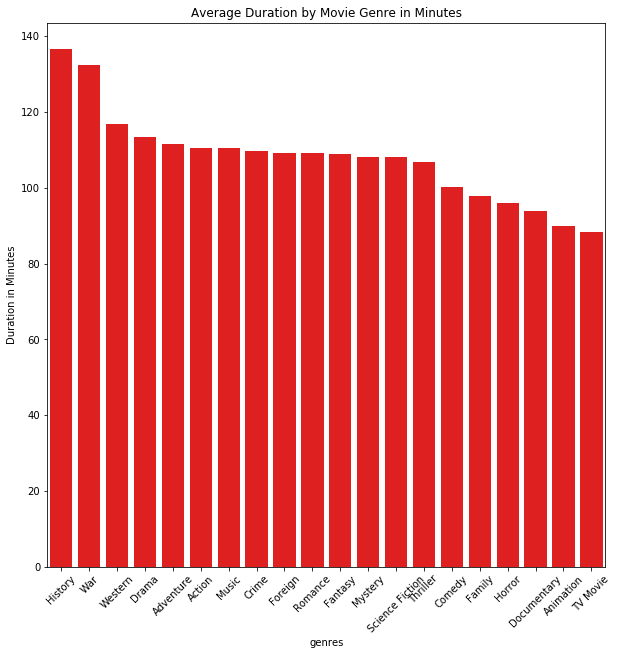

In [227]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.xticks(rotation=45)
r_dur = df[['runtime','genres']].reset_index()
r_dur1 = r_dur.groupby('genres').runtime.mean().reset_index()
r_dur2 = r_dur1.sort_values('runtime', ascending=False)
g = sns.barplot(x="genres", y="runtime", data=r_dur2, color='red')
g.set_title('Average Duration by Movie Genre in Minutes')
g.set_ylabel('Duration in Minutes')


In [653]:
z = df[df['genres']=='History'].groupby('title').runtime.sum().reset_index()
z = z.sort_values('runtime',ascending=False)
z

,title,runtime
51,Gettysburg,254.0
33,Cleopatra,248.0
169,Woodstock,225.0
56,Heaven's Gate,219.0
73,Lawrence of Arabia,216.0
53,Gods and Generals,214.0
77,Malcolm X,202.0
130,The Greatest Story Ever Told,199.0
102,Schindler's List,195.0
96,Reds,195.0


In [252]:
genr_grp = df.groupby('genres').runtime.mean().round(1).reset_index()
genr_grp = genr_grp.sort_values('runtime', ascending=False)
genr_grp.set_index('genres')

pop_grp = df.groupby('genres').popularity.mean().round(1).reset_index()
pop_avg = df.popularity.mean()

genr_pop = genr_grp.merge(pop_grp, left_on='genres', right_on='genres')
genr_pop['Compared_to_avg'] = genr_pop['popularity']/pop_avg - 1
np.corrcoef(df['popularity'],df['runtime'])

array([[ 1.        ,  0.22195413],
       [ 0.22195413,  1.        ]])

In [655]:
genr_grp = df.groupby('genres').runtime.mean().round(1).reset_index()
genr_grp = genr_grp.sort_values('runtime', ascending=False)
genr_grp.set_index('genres')
genr_grp.runtime.mean()

107.90000000000002

## Popularity of Select Genres between 2006 and 2016

In [372]:
df_10 = df[(df['year']>=2000) & (df['year']<=2016)]
df_10 = df_10[(df_10['genres'] == 'Action') | (df_10['genres']=='Comedy') | (df_10['genres']=='Drama') ]



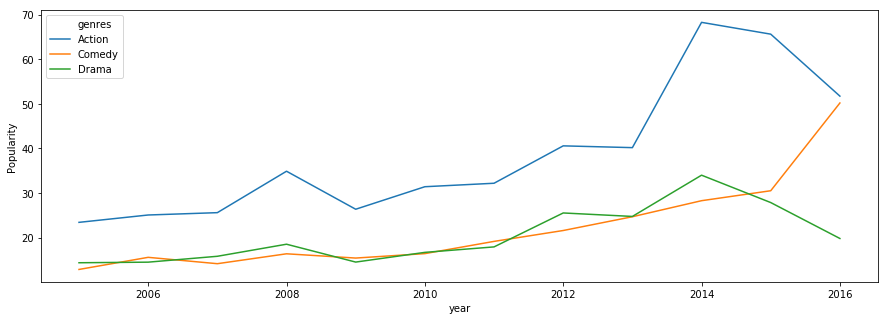

In [373]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
g = df_10.groupby(['genres','year']).popularity.mean().reset_index()
sns.lineplot(x='year', y='popularity', data=g, hue='genres')
plt.ylabel('Popularity')


In [315]:
df_10 = df[(df['year']>=2005) & (df['year']<=2016)]
x = df_10[(df_10['year']==2014) & (df_10['genres']=='Action')][['title','revenue']]
x.groupby('title').revenue.sum().reset_index()
x.sort_values('revenue', ascending=False).head(5)

,title,revenue
36,Transformers: Age of Extinction,1091405097
19,The Hobbit: The Battle of the Five Armies,956019788
94,Guardians of the Galaxy,773328629
81,Maleficent,758539785
46,X-Men: Days of Future Past,747862775


/Users/ryanfitzpatrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


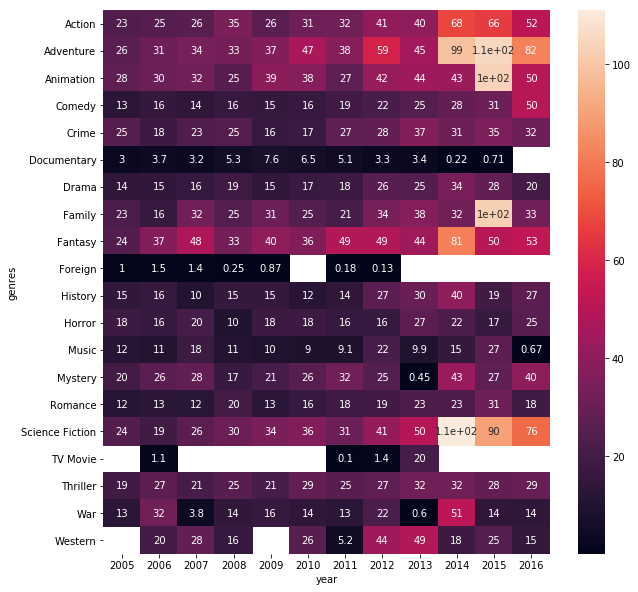

In [378]:

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
df_10 = df[(df['year']>=2005) & (df['year']<=2016)]
#eliminate NAs df_10
df_10['genre_fact'] = df_10['genres'].factorize()[0]
temp_df = df_10.groupby(['genres','year']).popularity.mean().reset_index()
sns.heatmap(temp_df.pivot('genres','year','popularity'),annot=True)

## Create WordClouds By Genre, By Release year

I'm interested in exploring the most common phrases/words found in the 'overviews' colum for the last ~10 years specifically for Animated films, through the creation of word clouds. More specifically, I'm curious if the results of each word cloud will coincide with my memory of that year in movies e.g. a notable characters name

I'll start by creating a dictionary using release year as the unique key, and combine all summaries for each year as their values.

In [590]:
df_10 = df[(df['year']>=2005) & (df['year']<=2016)]
year_dict = {year:[] for year in df_15['year'].unique()}
for i, r in df_10.iterrows():
    if r['genres']=='Animation':
        year_dict[r['year']].append(r['overview'])

In [564]:
from wordcloud import WordCloud, STOPWORDS
remove = STOPWORDS.copy()
ryanstopwords = pd.read_csv('Ryan_stop_words.csv', usecols=[0])
for i, r in ryanstopwords.iterrows():
    remove.add(r['Words'])
remove

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'also',
 'although',
 'am',
 'american',
 'an',
 'and',
 'another',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'aunt',
 'back',
 'be',
 'beat',
 'beats',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'being',
 'below',
 'best',
 'between',
 'both',
 'boy',
 'brother',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'come',
 'could',
 "couldn't",
 'daughter',
 'day',
 'did',
 "didn't",
 'discover',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'enough',
 'ever',
 'every',
 'family',
 'family ',
 "family's",
 'father',
 'feel',
 'feels',
 'few',
 'film',
 'find',
 'finds',
 'first',
 'for',
 'friend',
 'friends',
 'from',
 'further',
 'get',
 'good',
 'group',
 'guitar',
 "guitar's",
 'guitars',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 '

In [567]:

#function for creating word clouds by year
def draw_word_cloud(string,year):
    wc = WordCloud(stopwords=remove, background_color='White').generate(string)
    plt.figure()
    plt.imshow(wc)
    plt.axis('off')
    plt.title("Word Cloud by Year {}".format(year))
    plt.savefig('wc{}.png'.format(year))
    plt.close() 
    
#call the function  
for year in year_dict:
    draw_word_cloud(' '.join(str(r) for r in year_dict[year]),year)

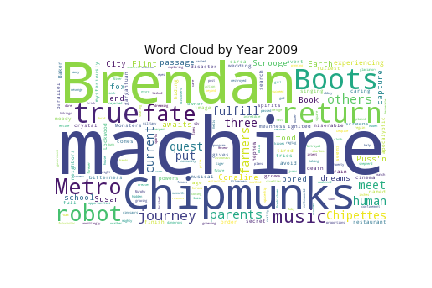

In [570]:
from IPython.display import Image
Image(filename='wc2009.png')

## Effect of first time directoring 
I'm curious to understand the impact of a directorial "debut" movie vs a 'follow-up' movie. One might assume that when a director first comes on the scene, that there might be less 'buzz' around them which could subsequently influence the popularity of the movie and its associated budget.

To start answering this question, I'll create a column identifies whether or not its an director's first movie or follow up.

In [571]:

old_directors, results = set(), []

for index, row in df_org.sort_values('year', ascending=True).iterrows():
    if row['director'] in old_directors:
        debut = 0
    else:
        debut = 1
    results.append(tuple([row['id'],debut]))    
    old_directors.add(row['director'])

merge_df = pd.DataFrame(results)

merge_df.columns= ['id','debut']
#set index to id, merge df by id
df_org = pd.merge(df_org, merge_df, on='id', how='inner')

In [572]:
debut = df_org[df_org['debut']==1]['popularity']
follow_up = df_org[df_org['debut']==0]['popularity']

print(debut.mean())
print(follow_up.mean())

14.462436253941162
28.25554521533441


In [573]:
debut = np.random.choice(debut, 200, replace=True)
follow_up = np.random.choice(follow_up, 200, replace=True)
from scipy.stats import ttest_ind
ttest_ind(debut, follow_up, equal_var=False)#used welchs

Ttest_indResult(statistic=-6.9311394715547525, pvalue=1.9845824006839718e-11)

As indicated by the low p value, there is in fact a big statistical difference between popularity scores for debuts vs. follow-ups; follow-ups are much more popular

## Effect on First Time Directoring on Budget

In [574]:
debut = df_org[df_org['debut']==1]['budget']
follow_up = df_org[df_org['debut']==0]['budget']

print(debut.mean())
print(follow_up.mean())

14520842.646357052
42988171.21859706


In [575]:
debut = np.random.choice(debut, 200, replace=True)
follow_up = np.random.choice(follow_up, 200, replace=True)
from scipy.stats import ttest_ind
ttest_ind(debut, follow_up, equal_var=False)#used welchs

Ttest_indResult(statistic=-7.8370400905044049, pvalue=8.6676694114204572e-14)

There is in fact a big statistical difference between budget for debuts vs. follow-ups; follow-ups have a much higher budget

## Exploring Most Frequently Appearing Actors

In [593]:
df_10 = df_org[(df_org['year']>=2005) & (df_org['year']<=2016)]
columns_of_interest = ['actor_1', 'actor_2', 'actor_3']
actors = []
for column in columns_of_interest:
    for actor in df_10[column].unique().tolist():
        actors.append(actor)
actors = set(actors)


actors_dictionary = {}
total = df_10.shape[0]
for actor in actors:
    actor_count = 0
    for col in columns_of_interest:
        actor_count += df_10.loc[df_10[col] == actor].shape[0]
        
    actors_dictionary[actor] = actor_count
actors_dictionary

{nan: 0,
 'Riley Griffiths': 1,
 'Hans Matheson': 2,
 'Mason Cook': 1,
 'Janette Scott': 1,
 'Yan Ni': 1,
 'Michelle Dockery': 1,
 'Damon Wayans Jr.': 2,
 'Topher Grace': 2,
 'Lambert Wilson': 3,
 'Milo Ventimiglia': 5,
 'Kevin Nealon': 1,
 'Jossara Jinaro': 1,
 'Jean François Heckel': 1,
 'Meisa Kuroki': 1,
 'Gina Carano': 1,
 'Jake Abel': 1,
 'Margot Robbie': 4,
 'Bijou Phillips': 1,
 'Glen-Paul Waru': 1,
 'Tim McGraw': 2,
 'Gaspard Ulliel': 1,
 'Cyril Roy': 1,
 'Heath Ledger': 5,
 'Russell Tovey': 1,
 'Adam Levine': 1,
 'Ariel Levy': 1,
 'Frankie Muniz': 2,
 'Shannen Fields': 1,
 'Nora Zehetner': 1,
 'Sheri Moon Zombie': 3,
 'Jason Harris': 1,
 'Ariana Stephens': 1,
 'Bill Fagerbakke': 1,
 'Goldy Notay': 1,
 'Alison Raimondi': 1,
 "Colin O'Donoghue": 1,
 'Rami Malek': 1,
 'Tamara Hope': 1,
 'Kierston Wareing': 1,
 'Jill Scott': 2,
 'Dolly Parton': 1,
 'Owen Williams': 1,
 'Andy Dick': 1,
 'Charles Durning': 1,
 'Jake Hoffman': 1,
 'Paul Eenhoorn': 1,
 'Peter Dinklage': 2,
 'Tim Ogle

In [620]:
actors_count = DataFrame(list(actors_dictionary.items()),columns = ['actor','count_of_movies'])
actors_count= actors_count.sort_values('count_of_movies', ascending=False)
actors_count = actors_count[actors_count['count_of_movies']>1]
top_10 = actors_count.head(10)
top_10

,actor,count_of_movies
216,Matt Damon,20
1326,Will Ferrell,20
437,Robert De Niro,18
2077,Nicolas Cage,18
2222,Steve Carell,18
1867,Mark Wahlberg,18
1135,Gerard Butler,18
3438,Owen Wilson,17
2155,Ewan McGregor,17
594,George Clooney,17


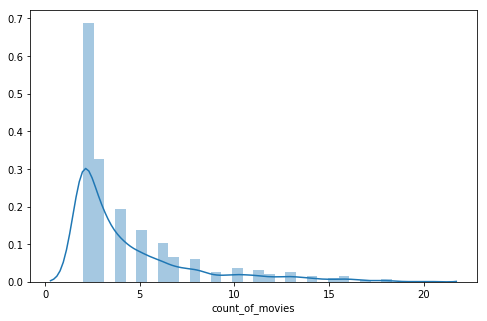

In [616]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.distplot(actors_count['count_of_movies'])

Matt Damon and Will Ferrell were in the top 99% percentile for most movies in the last 10  years


## Exploring Most Frequently Appearing Production Companies

In [618]:
columns_of_interest = ['p_comp_1', 'p_comp_2', 'p_comp_3']
p_comps = []
for column in columns_of_interest:
    for p_comp in df_10[column].unique().tolist():
        p_comps.append(p_comp)
p_comps = set(p_comps)


p_comp_dictionary = {}
for p_comp in p_comps:
    p_count = 0
    for col in columns_of_interest:
        p_count += df_10.loc[df_10[col] == p_comp].shape[0]
        
    p_comp_dictionary[p_comp] = p_count

p_comp_count = DataFrame(list(p_comp_dictionary.items()),columns = ['Prod_comp','count_of_movies']) 
p_comp_count.sort_values('count_of_movies', ascending=False).head(10)

,Prod_comp,count_of_movies
9,Universal Pictures,186
1051,Columbia Pictures,137
626,Paramount Pictures,112
684,Warner Bros.,112
2158,New Line Cinema,102
1517,Walt Disney Pictures,102
319,Twentieth Century Fox Film Corporation,95
2127,Relativity Media,79
1997,Lionsgate,67
812,Summit Entertainment,62


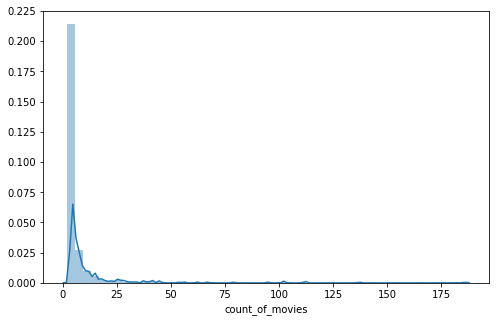

In [621]:
p_comp_count = p_comp_count[p_comp_count['count_of_movies']>1]
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.distplot(p_comp_count['count_of_movies'])